#  التعرف على النشاط البدني الإنساني باستخدام التعلم الآلي 
# Human Activity Recognition by Machine Learning 

### `01- Import Libraries | استيراد المكتبات`

In [1]:
#  استيراد المكتبات اللازمة لتحليل وتصوير البيانات 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

#  استيراد المكتبات اللازمة لنماذج التعلم الآلي 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# استيراد دوال قياس أداء النماذج
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### `02- Data Retriving & Display | سحب البيانات واستعراضها`


In [2]:
# سحب البيانات إلى إطار بيانات 
training_data = pd.read_csv('data/train.csv')
testing_data = pd.read_csv('data/test.csv')
training_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
# التحقق من أبعاد بيانات التدريب و الاختبار
print(f'Training data dimensions : {training_data.shape}')
print(f'Testing data dimensions : {testing_data.shape}')

Training data dimensions : (7352, 563)
Testing data dimensions : (2947, 563)


### `03- Data Description وصف البيانات`

Accelerometer:345
Gyroscope:213
Others:5


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text yticklabel objects>)

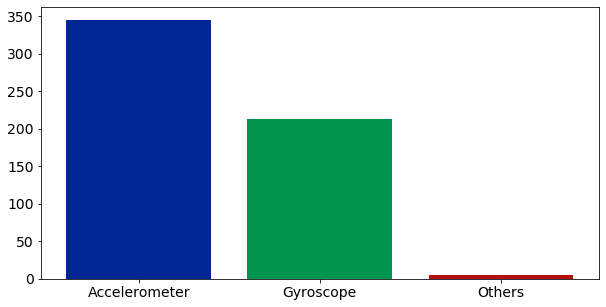

In [4]:
# المتغيرات الخاصة بالفئات الموجودة في الأعمدة
Acc = 0
Gyro = 0
other = 0

for value in training_data.columns:
    # التحقق من الأعمدة التي تحتوي على مستشعر التسارع
    if "Acc" in str(value):
        Acc += 1
    # التحقق من الأعمدة التي تحتوي على مستشعر الدوران
    elif "Gyro" in str(value):
        Gyro += 1
    # الأعمدة التي لا تشمل الفئتين السابقتين
    else:
        other += 1
        
# طباعة عدد الأعمدة التابعة لكل فئة وتصويرها بيانيًا
plt.figure(figsize = (10, 5))
print(f"Accelerometer:{Acc}\nGyroscope:{Gyro}\nOthers:{other}")
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [Acc, Gyro, other], color=('#002594','#00944c','#b31204'))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [5]:
# استعراض جميع الأعمدة التي لا ترتبط بأسماء المستشعرات
other_columns = [col for col in training_data.columns if ('Acc' in str(col) or 'Gyro' in str(col)) == 0]
other_columns

['angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)',
 'subject',
 'Activity']

### `04- Spliting Data تقسيم البيانات`

In [6]:
#  y X تقسيم كل من بيانات التدريب والاختبار إلى مدخلات ومخرجات 
X_train = training_data.drop(columns = ['Activity', 'subject'])
y_train = training_data["Activity"]

X_test = testing_data.drop(columns = ['Activity', 'subject'])
y_test = testing_data['Activity']


### `05- Data Visualization تصوير البيانات`

In [7]:
#  حساب تعداد ونسبة كل فعالية في مجموعة التدريب
df_activity_count = y_train.value_counts().to_frame(name = 'Counts')
df_activity_count['percentage %'] = y_train.value_counts(normalize=True).round(4) * 100
df_activity_count

,Counts,percentage %
LAYING,1407,19.14
STANDING,1374,18.69
SITTING,1286,17.49
WALKING,1226,16.68
WALKING_UPSTAIRS,1073,14.59
WALKING_DOWNSTAIRS,986,13.41


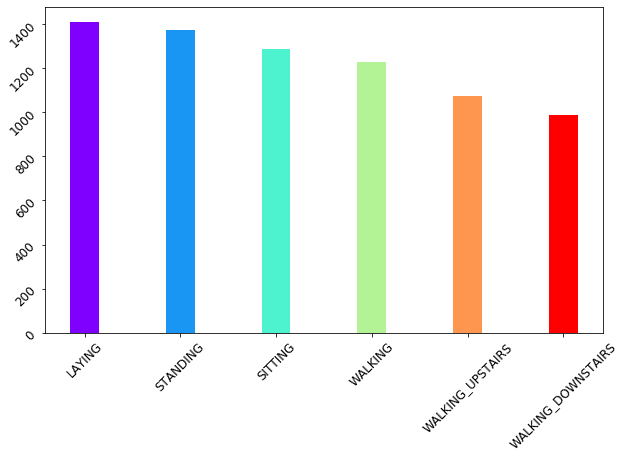

In [8]:
# bar chart تمثيل فئات النشاطات البدنية  من خلال الرسم البياني 
colors = cm.rainbow(np.linspace(0, 1, 6))
plt.figure(figsize=(10,6))
plt.bar(df_activity_count.index, df_activity_count['Counts'],width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=45,fontsize=12)
plt.show()

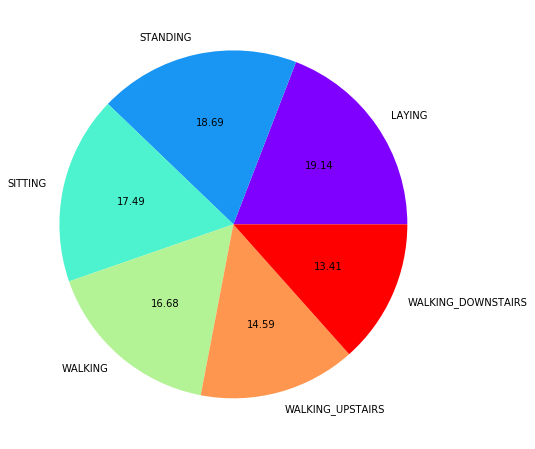

In [9]:
# Pie chart تصوير البيانات من خلال الرسم البياني 
plt.figure(figsize=(16,8))
plt.pie(df_activity_count['Counts'], labels = df_activity_count.index, autopct = '%0.2f', colors=colors)
plt.show()

In [10]:
training_data['subject'].unique()
standing_activity = training_data[training_data['Activity'] == 'STANDING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
print(time_series)

[0. 0. 0. ... 0. 0. 0.]


### `07- إعداد نماذج التعلم الآلي للتعرف على النشاطات البدنية`

#### `Support Vector Machine خوارزمية آلة المُتَّجهات الداعمة`

In [11]:
#  تدريب النموذج على بيانات التدريب
SVC_clf = SVC().fit(X_train, y_train)
#  اختبار النموذج عن طريق توقع بيانات الاختبار
SVC_prediction = SVC_clf.predict(X_test)
# التحقق من ضبط النموذج عن طريق مقارنة القيم الحقيقية و القيم المتوقعة
SVC_accuracy = accuracy_score(y_test, SVC_prediction)*100
# Accuracy | الضبط 
print(f'Support Vector Classifier accuracy: {SVC_accuracy:.2f} %')

Support Vector Classifier accuracy: 95.05 %


In [12]:
# استخراج تقرير التصنيف الخاص بقياس دقة النموذج
svm_report = pd.DataFrame(classification_report(y_test, SVC_prediction, output_dict=True))
svm_report

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,accuracy,macro avg,weighted avg
precision,1.0,0.937901,0.907942,0.942085,0.992248,0.931818,0.950458,0.951999,0.951286
recall,1.0,0.892057,0.945489,0.983871,0.914286,0.957537,0.950458,0.948873,0.950458
f1-score,1.0,0.914405,0.926335,0.962525,0.951673,0.944503,0.950458,0.949907,0.950376
support,537.0,491.000000,532.000000,496.000000,420.000000,471.000000,0.950458,2947.000000,2947.000000


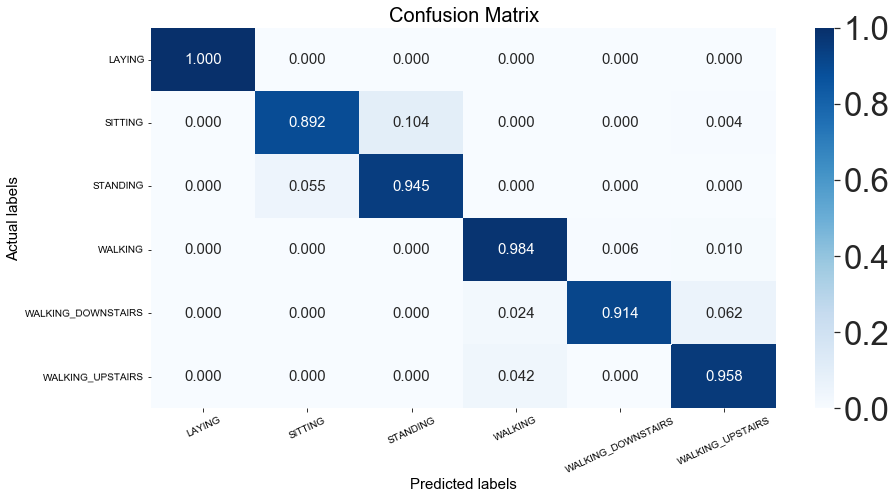

In [13]:
# استيراد المكتبات
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix استخراج قيم مصفوفة الدقة 
cm = confusion_matrix(y_test, SVC_prediction, normalize='true')

#  Heat Map تصوير المفوفة عن طريق الخريطة الحرارية 
fig, ax = plt.subplots(figsize=(14,7))
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, annot_kws={"fontsize":15}, cmap="Blues", fmt=".3f", ax=ax);  

# Heat Map تفضيلات الخريطة الحرارية  
label_font = {'size':'15'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Actual labels', fontdict=label_font);

title_font = {'size':'20'}
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  
ax.xaxis.set_ticklabels(SVC_clf.classes_ , rotation = 25);
ax.yaxis.set_ticklabels(SVC_clf.classes_, rotation=0.5);
plt.show()

#### `Logistic Regression خوارزمية الانحدار اللوجستي`

In [14]:
#  تدريب النموذج على بيانات التدريب
LR_clf = LogisticRegression().fit(X_train, y_train)
#  اختبار النموذج عن طريق توقع بيانات الاختبار
LR_prediction = LR_clf.predict(X_test)
# التحقق من ضبط النموذج عن طريق مقارنة القيم الحقيقية و القيم المتوقعة
LR_accuracy = accuracy_score(y_test, LR_prediction)*100
# Accuracy | الضبط 
print(f'Logistic Regression Classifier accuracy: {LR_accuracy:.2f} %')

Logistic Regression Classifier accuracy: 95.83 %


c:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
# استخراج تقرير التصنيف الخاص بقياس دقة النموذج
LR_report = pd.DataFrame(classification_report(y_test, LR_prediction, output_dict=True))
LR_report

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,accuracy,macro avg,weighted avg
precision,1.0,0.962054,0.900350,0.946154,0.990172,0.963283,0.958263,0.960335,0.959357
recall,1.0,0.877800,0.968045,0.991935,0.959524,0.946921,0.958263,0.957371,0.958263
f1-score,1.0,0.917998,0.932971,0.968504,0.974607,0.955032,0.958263,0.958185,0.958130
support,537.0,491.000000,532.000000,496.000000,420.000000,471.000000,0.958263,2947.000000,2947.000000


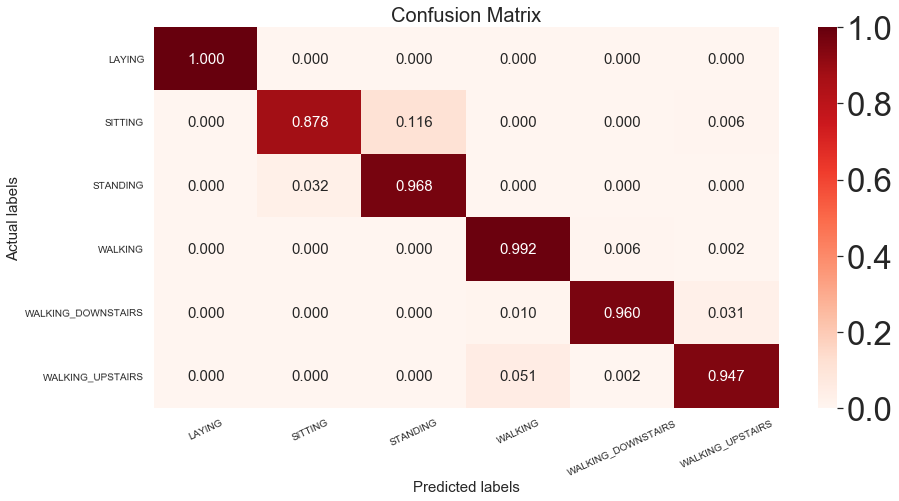

In [16]:
# Confusion Matrix استخراج قيم مصفوفة الدقة 
cm = confusion_matrix(y_test, LR_prediction, normalize='true')

#  Heat Map تصوير المفوفة عن طريق الخريطة الحرارية 
fig, ax = plt.subplots(figsize=(14,7))
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, annot_kws={"fontsize":15}, cmap="Reds", fmt=".3f", ax=ax);  

# Heat Map تفضيلات الخريطة الحرارية  
label_font = {'size':'15'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Actual labels', fontdict=label_font);

title_font = {'size':'20'}
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  
ax.xaxis.set_ticklabels(LR_clf.classes_ , rotation = 25);
ax.yaxis.set_ticklabels(LR_clf.classes_, rotation=0.5);
plt.show()

#### `K Nearest Neighbor خوارزمية الجار الأقرب`

In [17]:
#  تدريب النموذج على بيانات التدريب
KN_clf = KNeighborsClassifier().fit(X_train, y_train)
#  اختبار النموذج عن طريق توقع بيانات الاختبار
KN_prediction = KN_clf.predict(X_test)
# التحقق من ضبط النموذج عن طريق مقارنة القيم الحقيقية و القيم المتوقعة
KN_accuracy = accuracy_score(y_test, KN_prediction)*100
# Accuracy | الضبط 
print('K Nearest Neighbors Classifier accuracy: {}%'.format(KN_accuracy))

K Nearest Neighbors Classifier accuracy: 90.02375296912113%


In [18]:
# استخراج تقرير التصنيف الخاص بقياس دقة النموذج
KN_report = pd.DataFrame(classification_report(y_test, KN_prediction, output_dict=True))
KN_report

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,accuracy,macro avg,weighted avg
precision,1.000000,0.908879,0.830537,0.850877,0.937677,0.899142,0.900238,0.904519,0.904126
recall,0.994413,0.792261,0.930451,0.977823,0.788095,0.889597,0.900238,0.895440,0.900238
f1-score,0.997199,0.846572,0.877660,0.909944,0.856404,0.894344,0.900238,0.897020,0.899333
support,537.000000,491.000000,532.000000,496.000000,420.000000,471.000000,0.900238,2947.000000,2947.000000


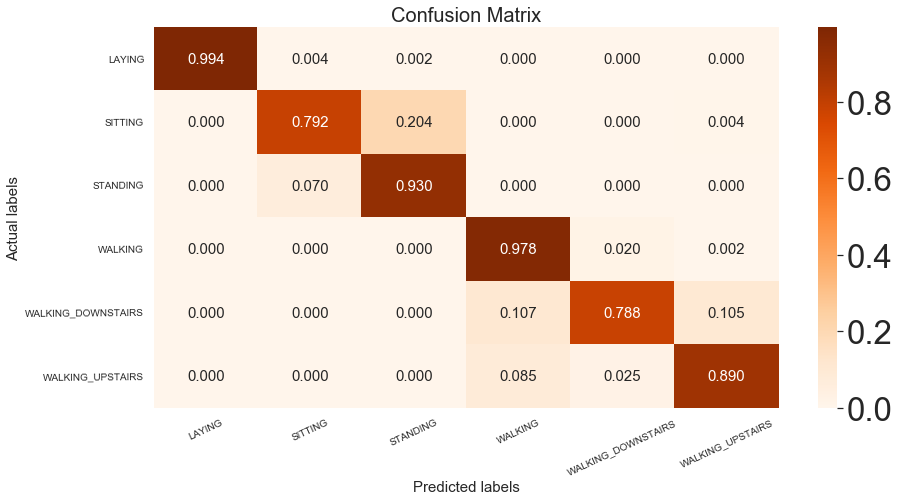

In [19]:
# Confusion Matrix استخراج قيم مصفوفة الدقة 
cm = confusion_matrix(y_test, KN_prediction, normalize='true')

#  Heat Map تصوير المفوفة عن طريق الخريطة الحرارية 
fig, ax = plt.subplots(figsize=(14,7))
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, annot_kws={"fontsize":15}, cmap="Oranges", fmt=".3f", ax=ax);  

# Heat Map تفضيلات الخريطة الحرارية  
label_font = {'size':'15'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Actual labels', fontdict=label_font);

title_font = {'size':'20'}
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  
ax.xaxis.set_ticklabels(KN_clf.classes_ , rotation = 25);
ax.yaxis.set_ticklabels(KN_clf.classes_, rotation=0.5);
plt.show()

#### `Random Forest خوارزمية الغابة العشوائية` 

In [20]:
#  تدريب النموذج على بيانات التدريب
RF_clf = RandomForestClassifier().fit(X_train, y_train)
#  اختبار النموذج عن طريق توقع بيانات الاختبار
RF_prediction = RF_clf.predict(X_test)
# التحقق من ضبط النموذج عن طريق مقارنة القيم الحقيقية و القيم المتوقعة
RF_accuracy = accuracy_score(y_test, RF_prediction)*100
# Accuracy | الضبط 
print('K Nearest Neighbors Classifier accuracy: {}%'.format(RF_accuracy))

K Nearest Neighbors Classifier accuracy: 92.60264675941634%


In [21]:
# استخراج تقرير التصنيف الخاص بقياس دقة النموذج
RF_report = pd.DataFrame(classification_report(y_test, RF_prediction, output_dict=True))
RF_report

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,accuracy,macro avg,weighted avg
precision,1.0,0.913223,0.909091,0.885609,0.964960,0.890295,0.926026,0.927196,0.927351
recall,1.0,0.900204,0.921053,0.967742,0.852381,0.895966,0.926026,0.922891,0.926026
f1-score,1.0,0.906667,0.915033,0.924855,0.905183,0.893122,0.926026,0.924143,0.925869
support,537.0,491.000000,532.000000,496.000000,420.000000,471.000000,0.926026,2947.000000,2947.000000


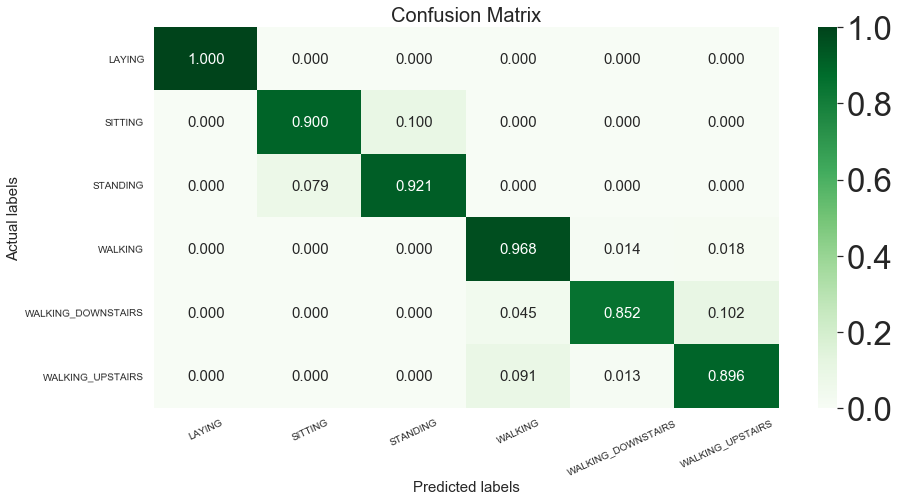

In [22]:
# Confusion Matrix استخراج قيم مصفوفة الدقة 
cm = confusion_matrix(y_test, RF_prediction, normalize='true')

#  Heat Map تصوير المفوفة عن طريق الخريطة الحرارية 
fig, ax = plt.subplots(figsize=(14,7))
sns.set(font_scale=3.0) # Adjust to fit
sns.heatmap(cm, annot=True, annot_kws={"fontsize":15}, cmap="Greens", fmt=".3f", ax=ax);  

# Heat Map تفضيلات الخريطة الحرارية  
label_font = {'size':'15'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Actual labels', fontdict=label_font);

title_font = {'size':'20'}
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=10)  
ax.xaxis.set_ticklabels(RF_clf.classes_ , rotation = 25);
ax.yaxis.set_ticklabels(RF_clf.classes_, rotation=0.5);
plt.show()